# Standard deviation $\sigma$

In [1]:
import matplotlib as mpl
import pandas as pd

from matplotlib import pyplot as plt
from src.domain.Query import JobQuery

from src.utils.general_checks.sim_durations_by_sigma import SimulationDataVisualization

from config.project_config import get_data_path
from src.simulation.LognormalFactorGenerator import LognormalFactorGenerator

In [2]:
jobs = JobQuery.get_by_source_name("Fisher and Thompson 10x10")
df_jobs = SimulationDataVisualization.make_unique_jobs_dataframe(jobs)
df_jobs

,Job,Routing_ID,Operation,Duration
0,01-0000,01-07,0,31
1,01-0001,01-06,0,46
2,01-0002,01-01,0,43
3,01-0003,01-05,0,84
4,01-0004,01-04,0,14
...,...,...,...,...
9013,01-9013,01-06,0,46
9014,01-9014,01-08,0,76
9015,01-9015,01-02,0,91
9016,01-9016,01-04,0,14


In [3]:
lognormal_factor_gen = LognormalFactorGenerator(sigma=0.25, seed=42)

# Faktoren für alle Zeilen erzeugen
factors = lognormal_factor_gen.sample_many(len(df_jobs))

# Neue Spalte berechnen
df_jobs["Simulation"] = (df_jobs["Duration"] * pd.Series(factors)).round(0).astype(int)
df_jobs

,Job,Routing_ID,Operation,Duration,Simulation
0,01-0000,01-07,0,31,32
1,01-0001,01-06,0,46,39
2,01-0002,01-01,0,43,57
3,01-0003,01-05,0,84,79
4,01-0004,01-04,0,14,11
...,...,...,...,...,...
9013,01-9013,01-06,0,46,36
9014,01-9014,01-08,0,76,61
9015,01-9015,01-02,0,91,91
9016,01-9016,01-04,0,14,16


In [4]:
gen1 = LognormalFactorGenerator(sigma=0.2, seed=42)
gen2 = LognormalFactorGenerator(sigma=0.2, seed=42)
gen3 = LognormalFactorGenerator(sigma=0.2, seed=42)

print(gen1.sample_many(5))
print(gen2.sample_many(6))
print(gen3.sample_many(7))

[1.029491785503886, 0.8874803535858716, 1.259805301256862, 0.9535038534761084, 0.8064091244724341]
[1.029491785503886, 0.8874803535858716, 1.259805301256862, 0.9535038534761084, 0.8064091244724341, 1.0974727576463426]
[1.029491785503886, 0.8874803535858716, 1.259805301256862, 0.9535038534761084, 0.8064091244724341, 1.0974727576463426, 0.776057236792309]


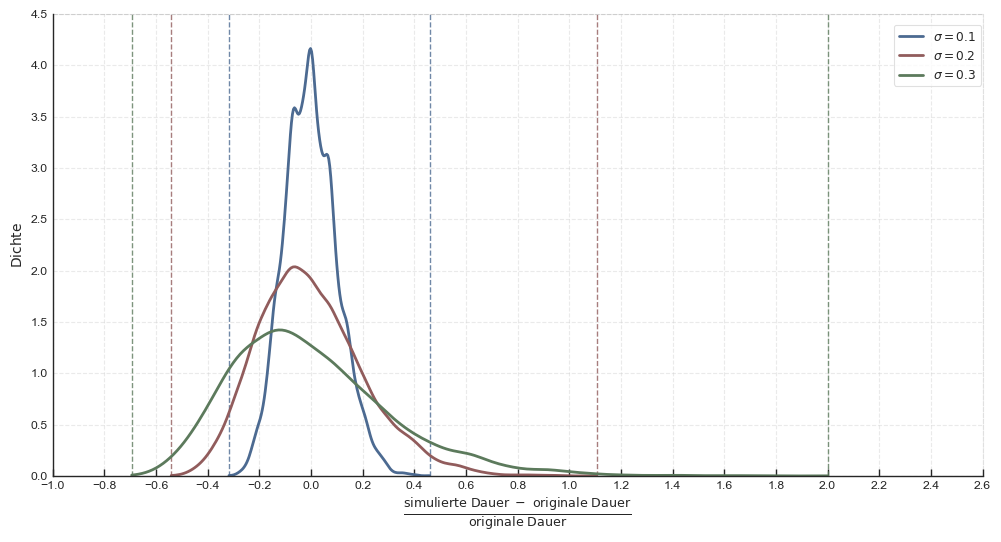

In [5]:
SimulationDataVisualization.set_latex_style(mono=False)

fig = SimulationDataVisualization.plot_relative_deviation_kde(
    df_jobs,
    sigmas=[0.1, 0.2, 0.3],
    x_min=-1, x_max=2.6, x_step=0.2,
    x_font_size = 13, y_max = 4.5
)

file_path = get_data_path("output", "sim_sigma_plot_Dichte_relative", as_string=True)
fig.savefig(file_path +".pdf", format="pdf", bbox_inches="tight")
fig.savefig(file_path +".png", format="png")

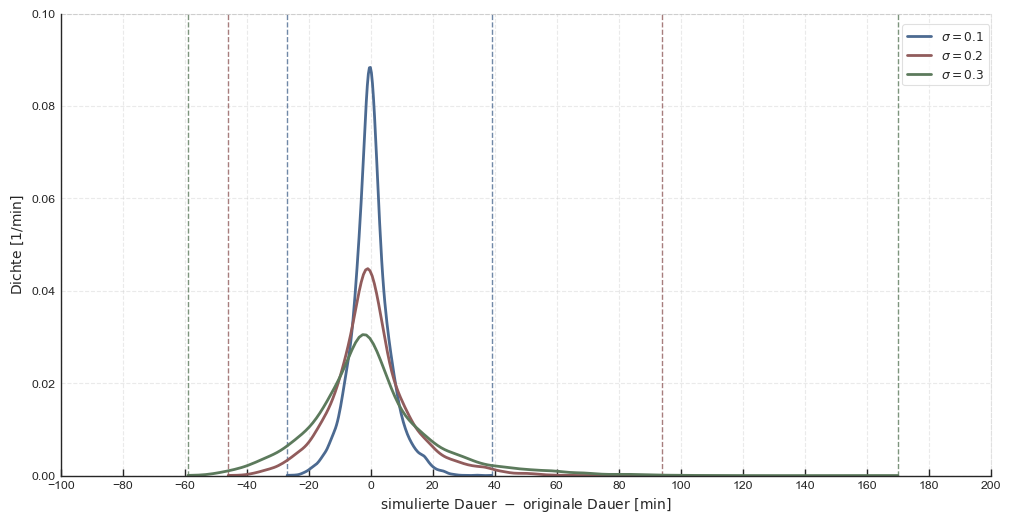

In [6]:
SimulationDataVisualization.set_latex_style(mono=False)
fig = SimulationDataVisualization.plot_absolute_deviation_kde(
    df_jobs,
    sigmas=[0.1, 0.2, 0.3], x_min = - 100, x_max = 200, x_step = 20, y_max = 0.1
)

file_path = get_data_path("output", "sim_sigma_plot_Dichte", as_string=True)
fig.savefig(file_path +".pdf", format="pdf", bbox_inches="tight")
fig.savefig(file_path +".png", format="png")

In [7]:
#df_jobs = SimulationDataVisualization.make_jobs_dataframe(jobs)
#df_jobs

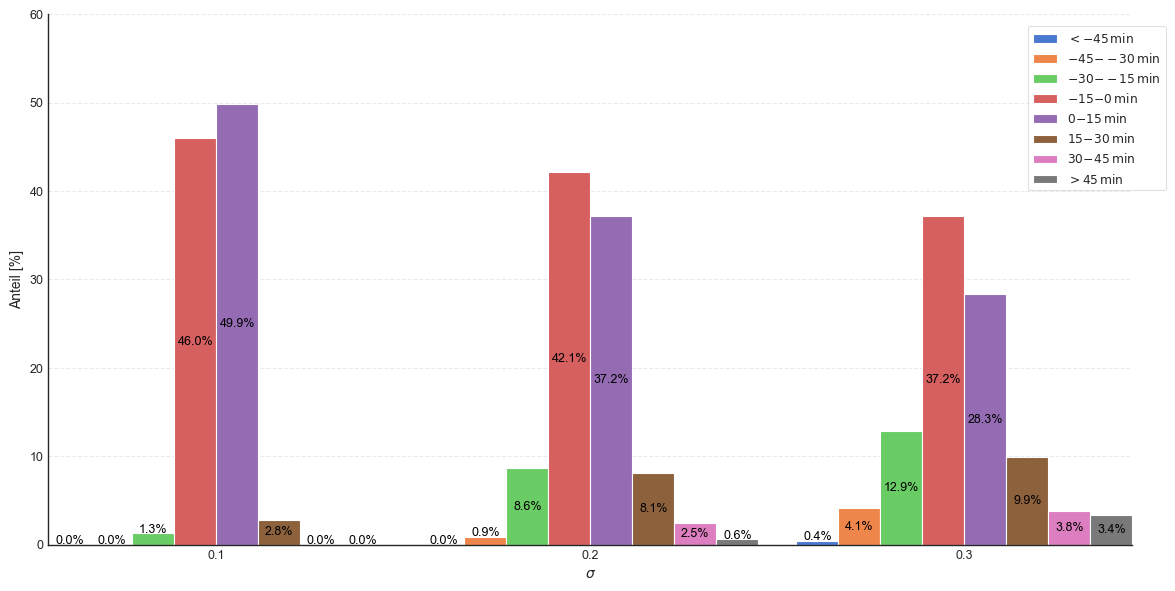

In [8]:
SimulationDataVisualization.set_latex_style(axis_grid = "y")
fig = SimulationDataVisualization.plot_deviation_sigma_summary(df_jobs, sigmas=[0.1, 0.2, 0.3], with_negative = True, y_max= 60, label_threshold = 0.0)
file_path = get_data_path("output", "sim_sigma_plot_Anteil", as_string=True)
fig.savefig(file_path +".pdf", format="pdf")
fig.savefig(file_path +".png", format="png")
plt.show()


In [9]:
mpl.rcdefaults()